# Import Libraries

In [11]:
# pip install pandas scikit-learn memory_profiler numpy

import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example model
from memory_profiler import memory_usage


# Load Dataset

In [29]:

    
# Load Dataset
file_path = "mango_features_all_images.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)  # Use read_excel for .xlsx files

# Extract features and labels
X = df.iloc[:, 1:].values  # All columns except the first (features)
y = df.iloc[:, 0].values   # First column (labels)
print(X)
print(y)


[[ 2.66863000e+05  2.84181745e+03  6.33729797e+02 ... -3.70592271e-02
  -1.34946799e-02  5.55312519e-03]
 [ 3.36044000e+05  6.00553559e+03  6.06485168e+02 ... -2.03859076e-02
   2.69467363e-02  3.86279241e-04]
 [ 3.54680000e+05  2.93070475e+03  7.71648438e+02 ...  2.06797350e-02
  -3.19970173e-02 -3.79321407e-03]
 ...
 [ 5.11334500e+05  3.19210468e+03  1.09332483e+03 ... -2.67089008e-02
   2.68098820e-02  7.17044093e-04]
 [ 4.20964000e+05  2.89283260e+03  8.72094238e+02 ... -2.79992757e-02
   1.07618023e-02  3.12508733e-03]
 [ 4.30475500e+05  3.13878087e+03  1.01271130e+03 ...  2.45752809e-02
   2.07502985e-02  6.40295244e-03]]
['Anwar Ratool' 'Anwar Ratool' 'Anwar Ratool' ... 'Sindhri' 'Sindhri'
 'Sindhri']


# Preprocessing

In [33]:
# Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)



[[-1.3787283  -0.44971142 -1.54768179 ... -1.11840857 -1.30930606
   1.20536251]
 [-0.67978521  1.60928823 -1.71477082 ... -0.55374184  0.78442933
   0.11211341]
 [-0.4915037  -0.39186211 -0.70183833 ...  0.83700716 -2.26721016
  -0.77222247]
 ...
 [ 1.09119358 -0.22173874  1.27097603 ... -0.7678794   0.7773441
   0.1820997 ]
 [ 0.17817069 -0.41650992 -0.08581265 ... -0.81157986 -0.05349802
   0.69161579]
 [ 0.2742664  -0.25644276  0.77658003 ...  0.96893561  0.46362699
   1.38517683]]
[0 0 0 ... 7 7 7]


# Pairplot for Feature Relationships

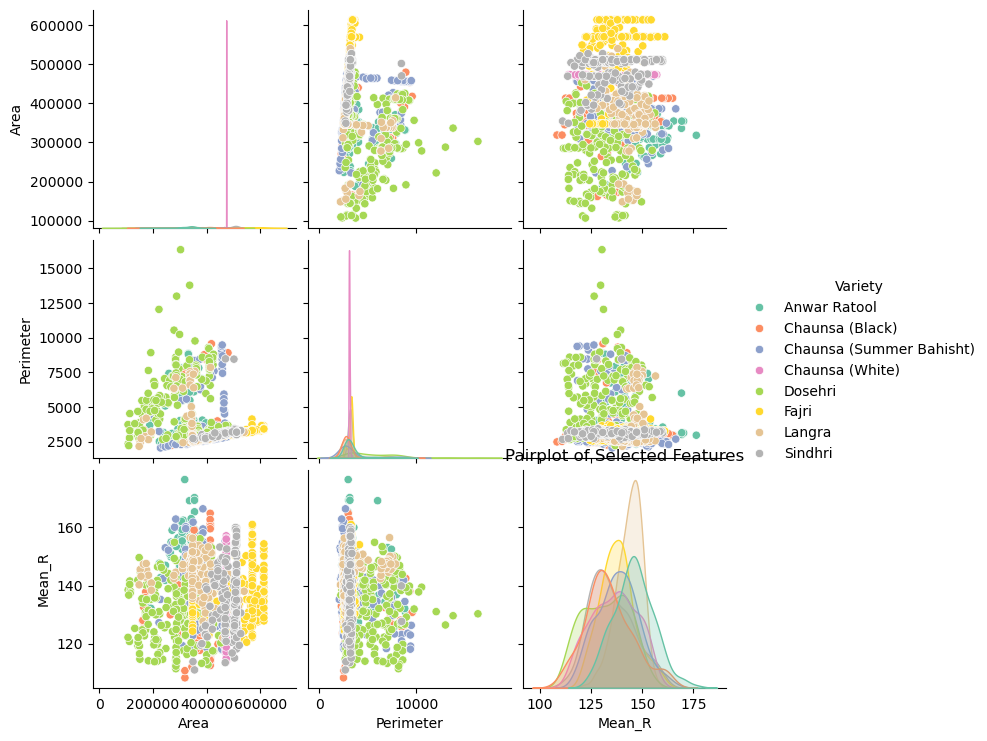

In [72]:
sns.pairplot(df, vars=['Area', 'Perimeter', 'Mean_R'], hue='Variety', palette='Set2')
plt.title('Pairplot of Selected Features')
plt.show()


# Visualizing Feature Distributions

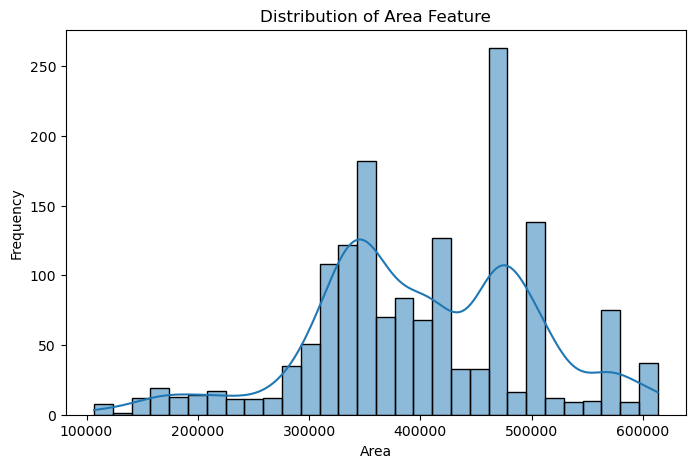

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of the 'Area' feature
plt.figure(figsize=(8, 5))
sns.histplot(df['Area'], kde=True, bins=30)
plt.title('Distribution of Area Feature')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


# Define Model

In [35]:
# Define Model
model = RandomForestClassifier(n_estimators=100, random_state=42)


# Calculate Average Feature Extraction Time

In [37]:
# Average Feature Extraction Time
def calculate_feature_extraction_time(X_sample):
    start_time = time.time()
    # Simulate feature extraction (no actual transformation needed here)
    _ = scaler.transform([X_sample])
    end_time = time.time()
    return end_time - start_time

sample_features = X_train[0]
feature_extraction_time = calculate_feature_extraction_time(sample_features)
print(f"Average Feature Extraction Time: {feature_extraction_time:.4f} seconds per feature")


Average Feature Extraction Time: 0.0006 seconds per sample


# Calculate Training Time

In [39]:
# Training Time
def calculate_training_time(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    return end_time - start_time

training_time = calculate_training_time(model, X_train, y_train)
print(f"Training Time: {training_time:.2f} seconds")


Training Time: 1.04 seconds


# Calculate Average Inference Time

In [50]:
# Average Inference Time
def calculate_inference_time(model, X_sample):
    start_time = time.time()
    _ = model.predict([X_sample])
    end_time = time.time()
    return end_time - start_time

inference_time = calculate_inference_time(model, sample_features)
print(f"Average Inference Time: {inference_time:.4f} seconds per sample")


Average Inference Time: 0.0131 seconds per sample


# Calculate Peak Memory Usage

In [41]:
# Peak Memory Usage
def calculate_peak_memory_usage(model, X_train, y_train):
    def train_model():
        model.fit(X_train, y_train)

    mem_usage = memory_usage((train_model,))
    return max(mem_usage)

peak_memory_usage = calculate_peak_memory_usage(model, X_train, y_train)
print(f"Peak Memory Usage: {peak_memory_usage:.2f} MB")


Peak Memory Usage: 227.96 MB


# Confusion Matrix

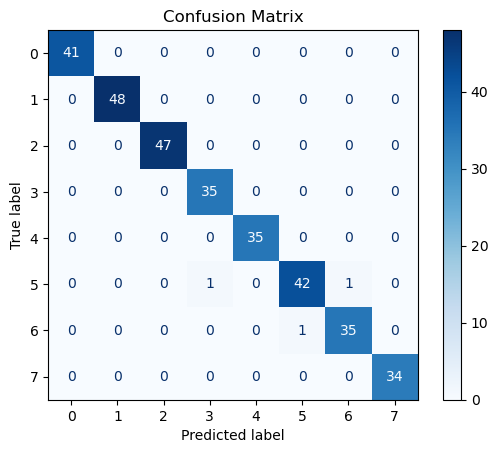

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
